In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel("/content/Online Retail (1).xlsx")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
total customers : 4373
differnt products : 4070
differnt invoice no. : 25900
Null entries in respective coloumns :
customer Id column : 135080
description column : 1454
invoice column : 0


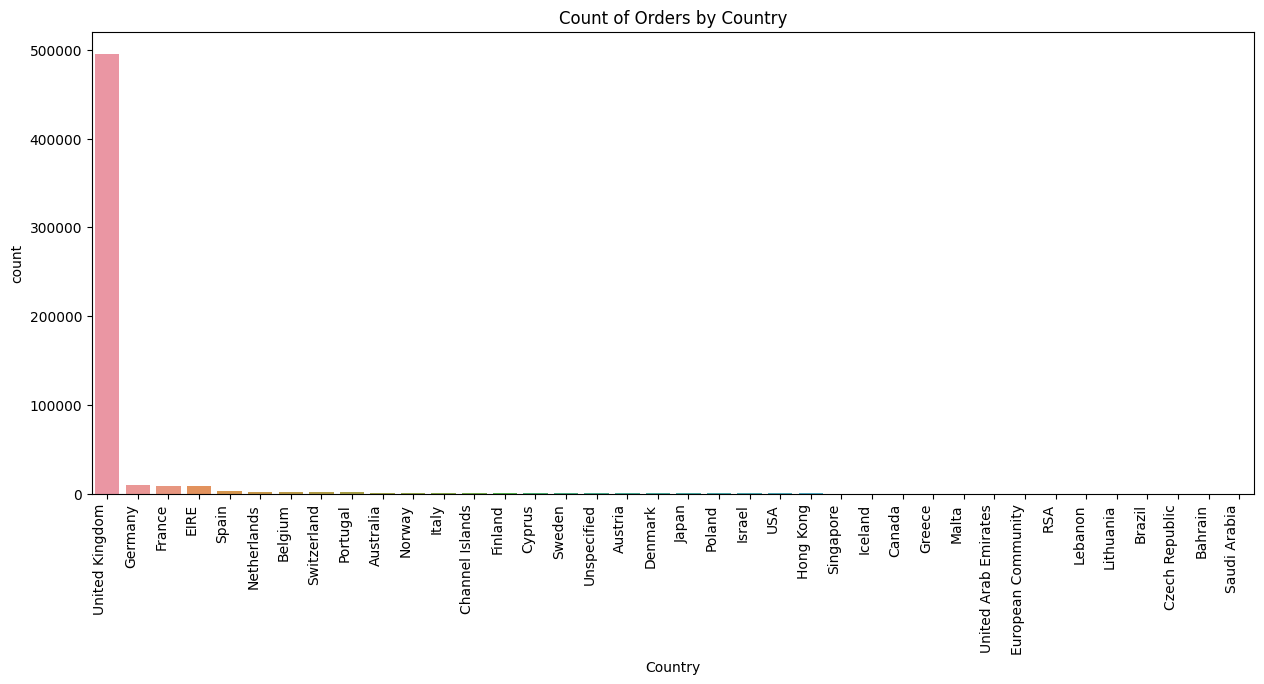

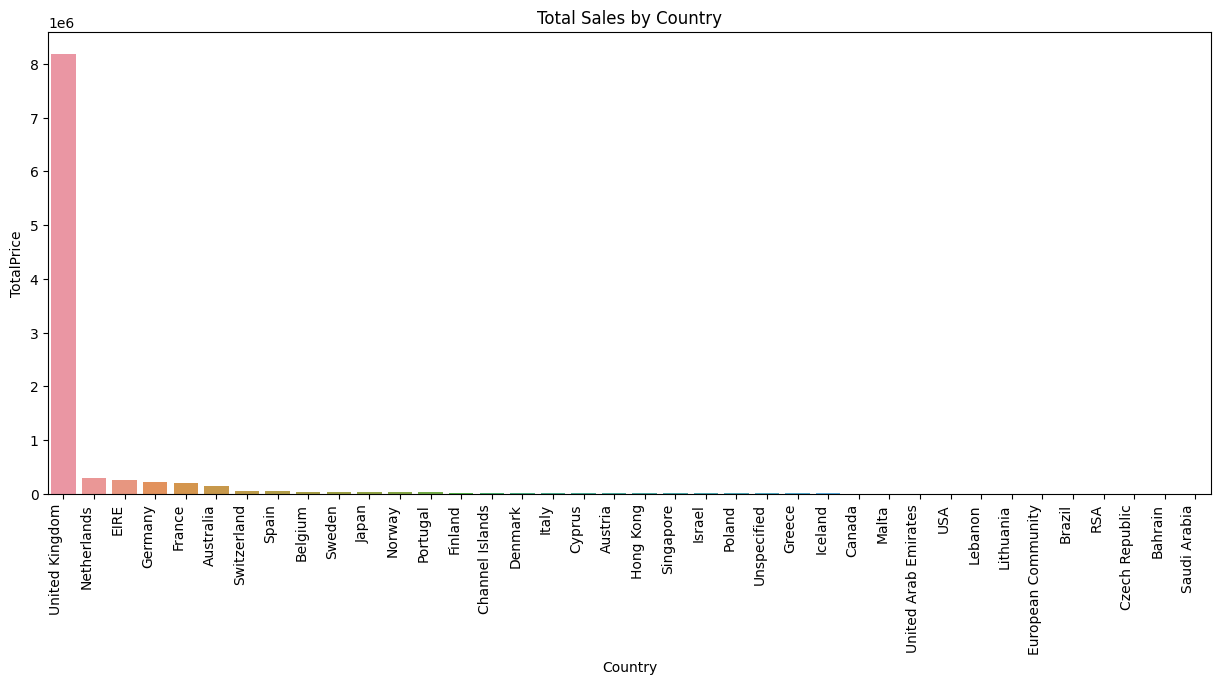

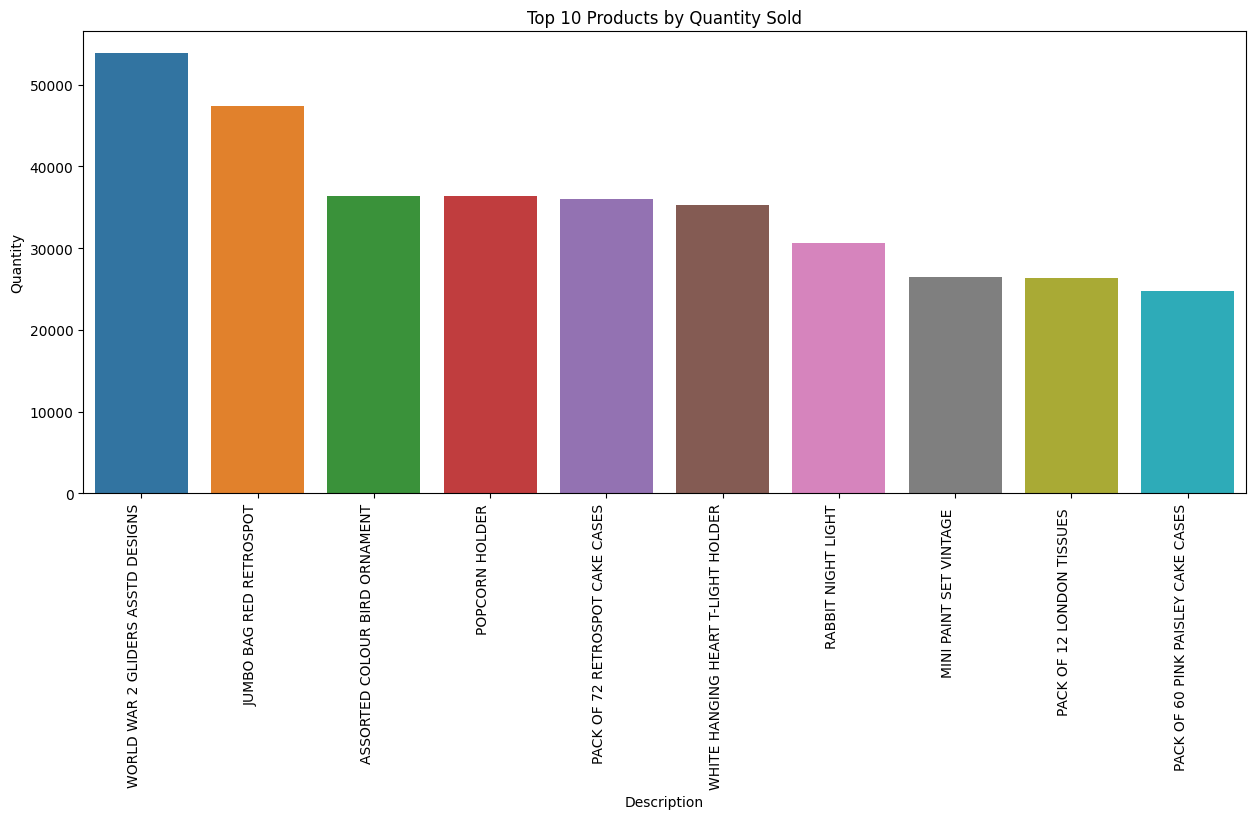

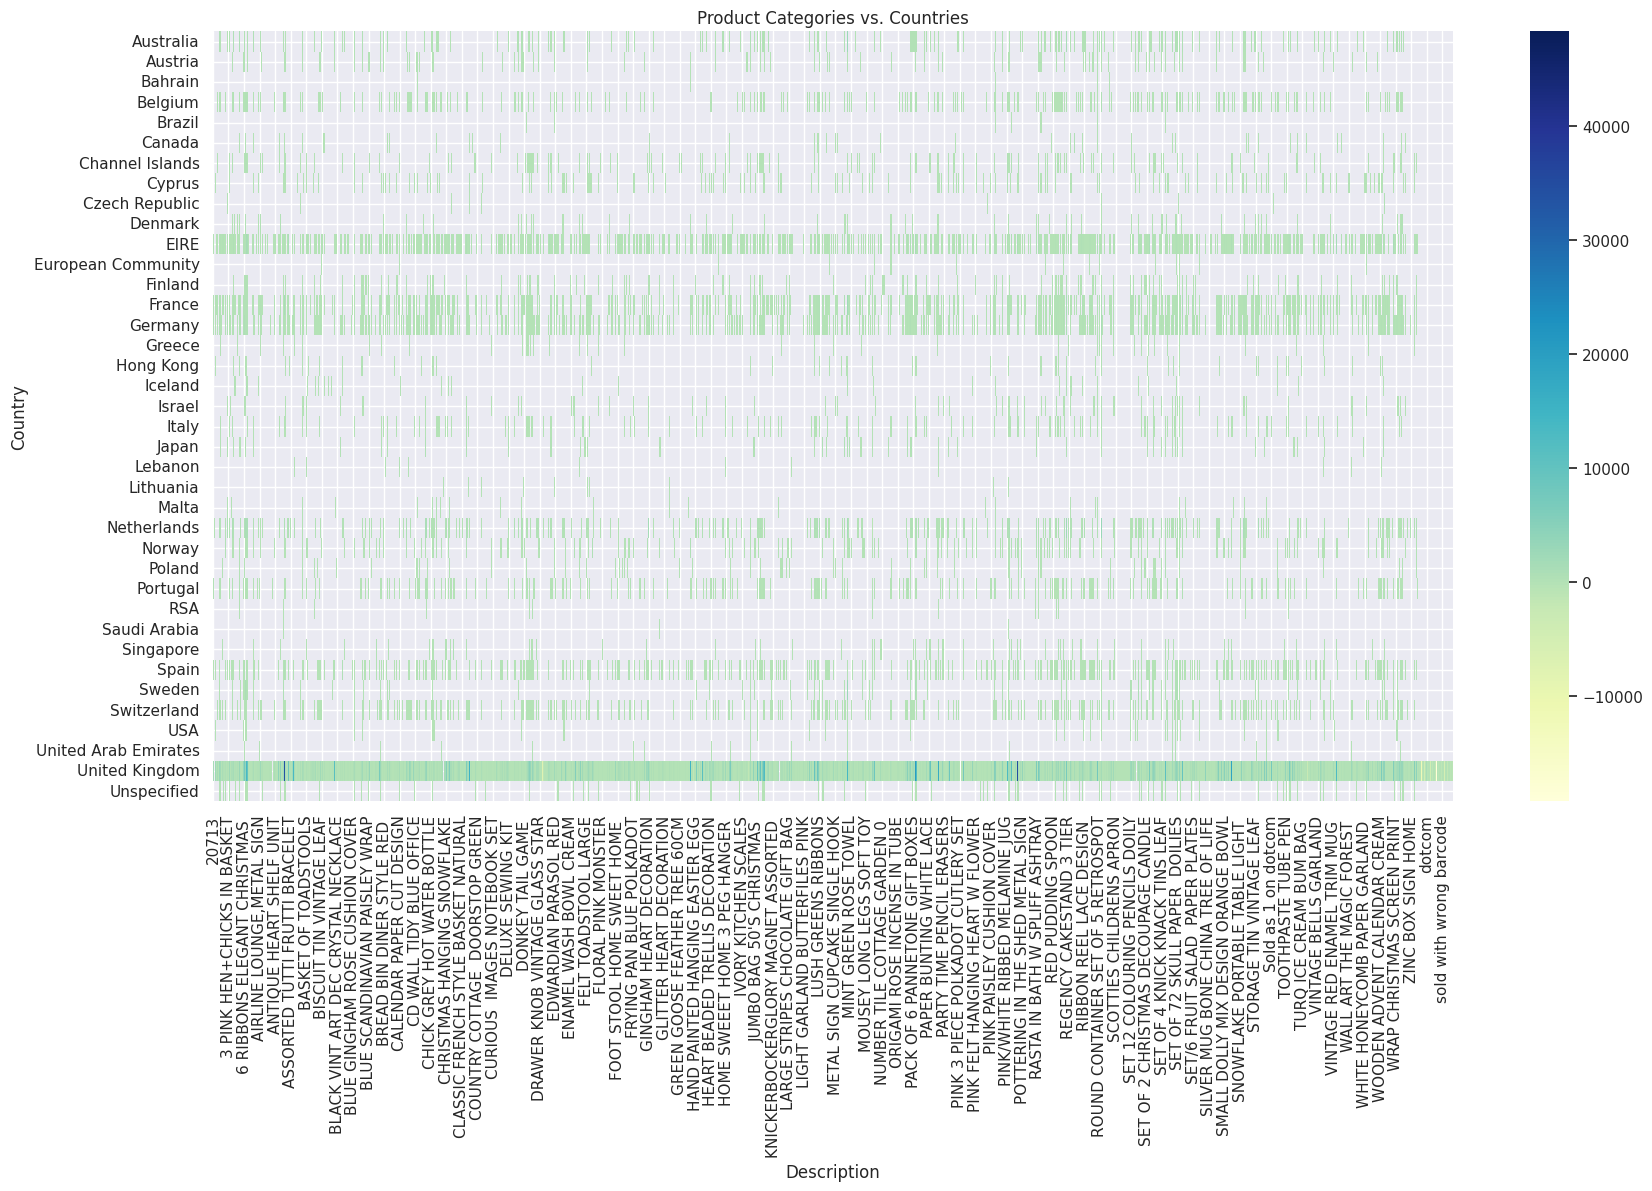

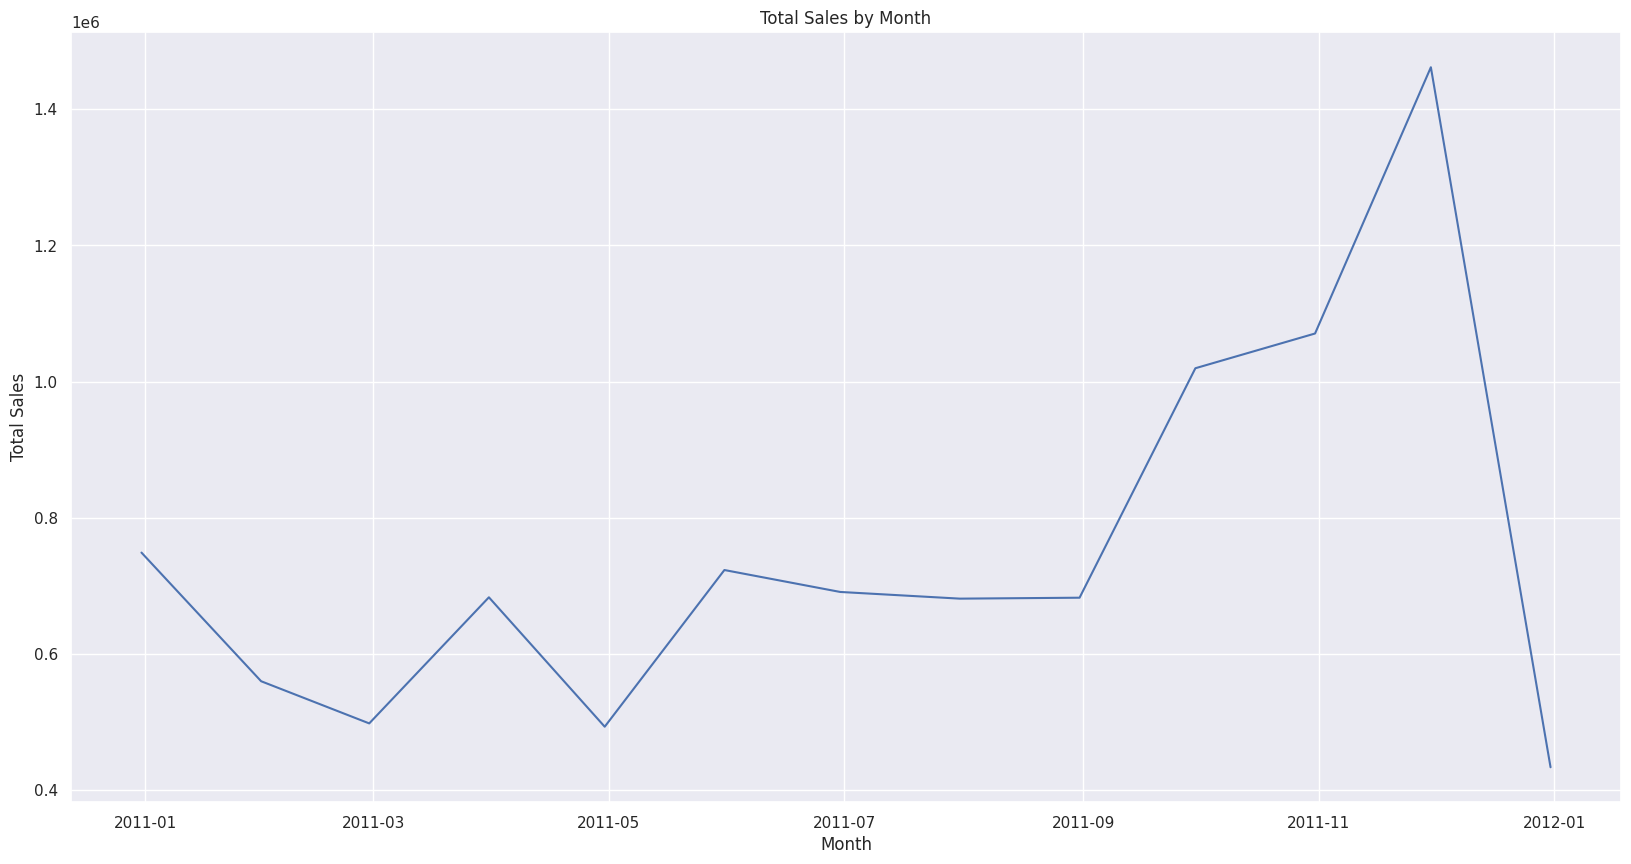

In [ ]:
#@title Default title text
# data analysis and visualisation -->
print(df.describe())
print("total customers :",len(df.CustomerID.unique()))
print("differnt products :",len(df.StockCode.unique()))
print("differnt invoice no. :",len(df.InvoiceNo.unique()))

print("Null entries in respective coloumns :")
print("customer Id column :",df['CustomerID'].isna().sum())
print("description column :",df['Description'].isna().sum())
print("invoice column :",df['InvoiceNo'].isna().sum())
df.dropna(axis=1)
# Visualization -->
import matplotlib.pyplot as plt
import seaborn as sns

# making a column for total price spent by a customer
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
# Count of orders by country
plt.figure(figsize=(15,6))
ax = sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Orders by Country')
plt.show()

# Total sales by country
sales_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,6))
ax = sns.barplot(x='Country', y='TotalPrice', data=sales_by_country, order=sales_by_country['Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Total Sales by Country')
plt.show()

# Top 10 products by quantity sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[:10].reset_index()

plt.figure(figsize=(15,6))
ax = sns.barplot(x='Description', y='Quantity', data=top_products, order=top_products['Description'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Top 10 Products by Quantity Sold')
plt.show()

# Create a pivot table with the countries in the rows and the product categories in the columns
pivot = pd.pivot_table(df,values='Quantity', index='Country', columns='Description', aggfunc='sum')

# Plot a heatmap of the pivot table
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Product Categories vs. Countries')
plt.show()

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group the data by month and calculate the total sales for each month
sales_by_month = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalPrice'].sum()

# Create a line plot of the total sales by month
plt.plot(sales_by_month.index, sales_by_month.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.show()



<ipython-input-6-47e7d8103595>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


      CustomerID                                        Description
0        12346.0  MEDIUM CERAMIC TOP STORAGE JAR MEDIUM CERAMIC ...
1        12347.0  BLACK CANDELABRA T-LIGHT HOLDER AIRLINE BAG VI...
2        12348.0  72 SWEETHEART FAIRY CAKE CASES 60 CAKE CASES D...
3        12349.0  PARISIENNE CURIO CABINET SWEETHEART WALL TIDY ...
4        12350.0  CHOCOLATE THIS WAY METAL SIGN METAL SIGN NEIGH...
...          ...                                                ...
4367     18280.0  WOOD BLACK BOARD ANT WHITE FINISH RETROSPOT LA...
4368     18281.0  ROBOT BIRTHDAY CARD CARD CIRCUS PARADE PENNY F...
4369     18282.0  ANTIQUE CREAM CUTLERY CUPBOARD FRENCH STYLE ST...
4370     18283.0  CHARLOTTE BAG PINK POLKADOT LUNCH BAG WOODLAND...
4371     18287.0  SMALL PURPLE BABUSHKA NOTEBOOK  SMALL RED BABU...

[4372 rows x 2 columns]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


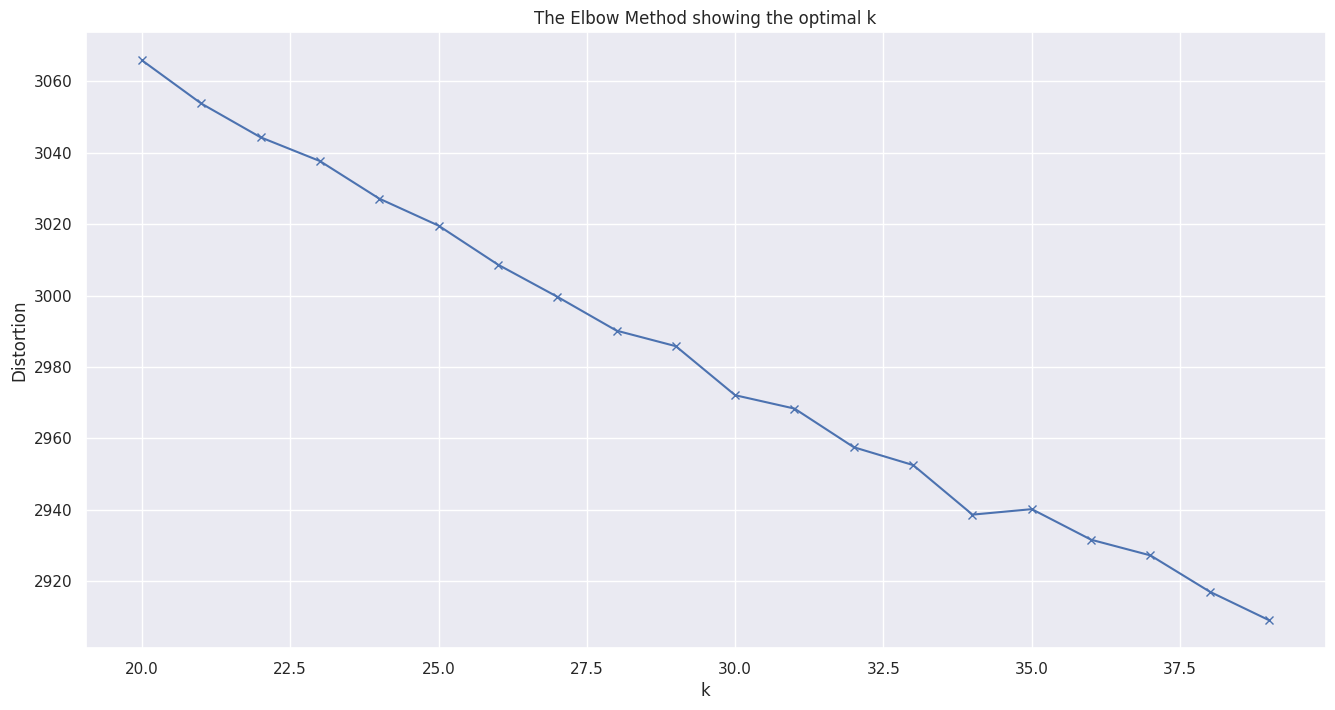

number of customers in each cluster : 1     578
18    419
15    414
8     309
11    260
7     257
5     248
9     236
3     190
10    189
19    178
14    167
6     165
12    163
16    147
4     132
2     123
13     98
17     85
0      14
Name: Cluster, dtype: int64
customers with similar product : [12503. 12505. 12603. 13154. 15299. 15369. 15590. 15802. 15940. 16454.
 17065. 17448. 17846. 18133.]
customers with similar product : [12346. 12350. 12353. 12358. 12386. 12401. 12403. 12414. 12445. 12450.
 12464. 12500. 12504. 12522. 12531. 12538. 12547. 12565. 12588. 12596.
 12612. 12622. 12641. 12659. 12664. 12665. 12666. 12725. 12755. 12756.
 12769. 12789. 12791. 12814. 12815. 12816. 12817. 12829. 12837. 12855.
 12864. 12870. 12875. 12881. 12888. 12891. 12908. 12917. 12919. 12929.
 12966. 12968. 12977. 12980. 12988. 12989. 12994. 12995. 13002. 13026.
 13058. 13061. 13062. 13079. 13080. 13083. 13091. 13099. 13104. 13106.
 13132. 13135. 13145. 13146. 13147. 13153. 13170. 13182. 13185. 13188.

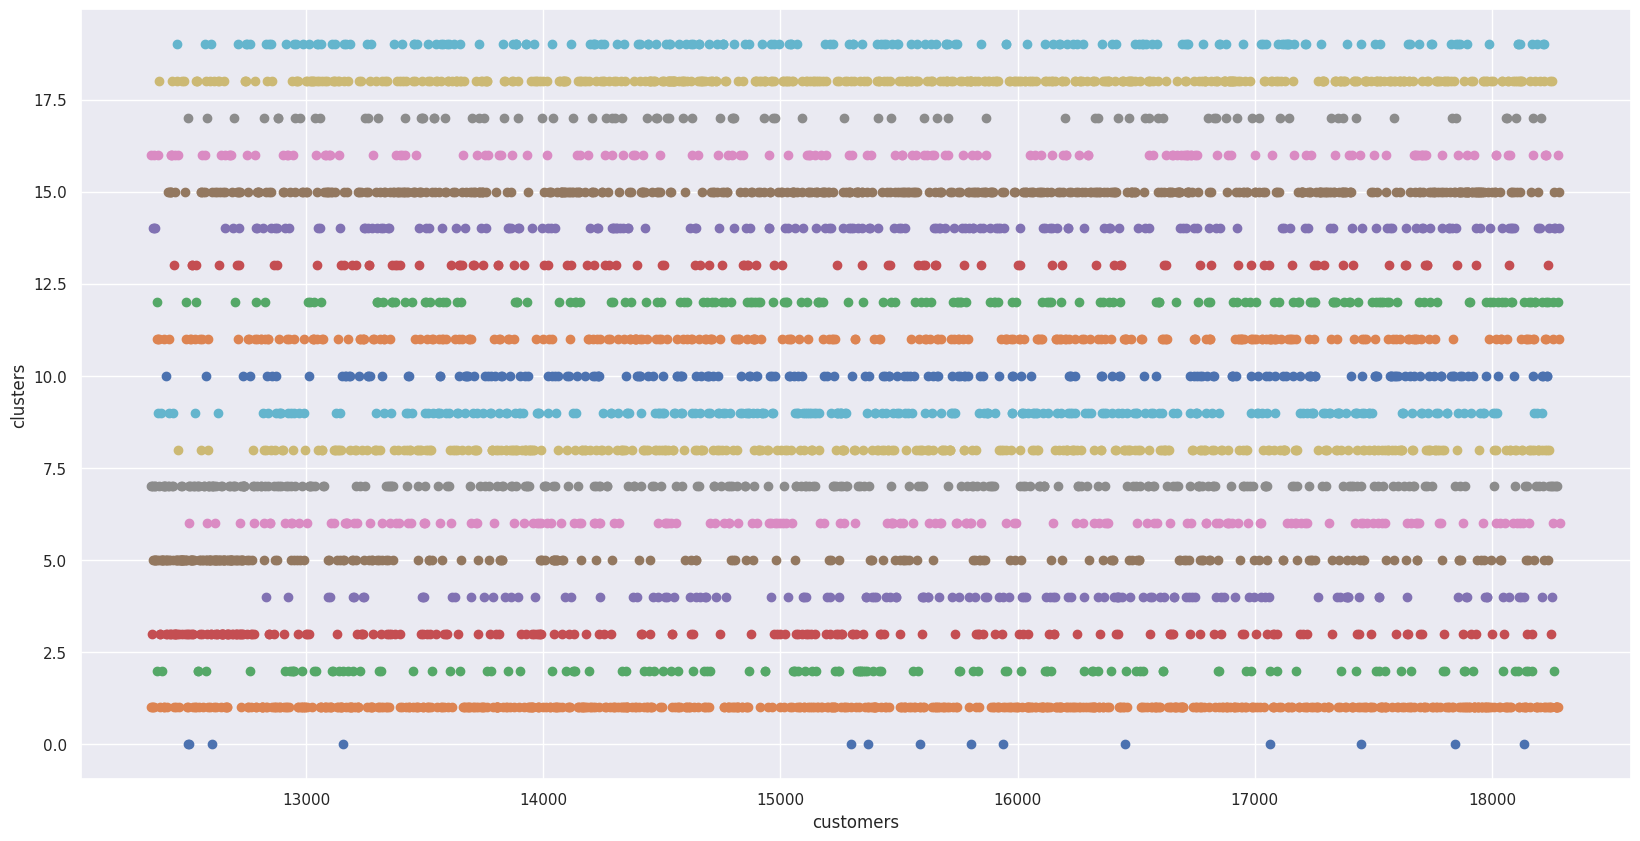

In [ ]:
# grouping customers based on description of products (ie type of product customers are purchasing) -->
# text clustering
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Load the dataset
data = df
# Select the relevant columns for clustering
X = data[['CustomerID', 'Description']]

# Remove rows with missing values
X.dropna(inplace=True)

# Group the data by customer ID and concatenate the product descriptions for each customer into a single string
grouped_data = X.groupby('CustomerID')['Description'].apply(lambda x: ' '.join(x)).reset_index()
print(grouped_data)
# Convert the concatenated product descriptions into a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_features = vectorizer.fit_transform(grouped_data['Description'])
# elbow method for determining optimum number of clusters -->
distortions = []
K = range(20,40)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_features)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Use K-means clustering algorithm to cluster the customers based on their product descriptions
kmeans = KMeans(n_clusters=20, random_state=0).fit(X_features)

# Add the cluster labels to the original data
grouped_data['Cluster'] = kmeans.labels_

# Print the number of customers in each cluster
print("number of customers in each cluster :",grouped_data['Cluster'].value_counts())

grouped_data['Cluster'] = kmeans.labels_

import matplotlib.pyplot as plt
# Plot the clusters of customers

for i in range((20)):
    x = grouped_data[grouped_data['Cluster'] == i]['CustomerID'].values

    print("customers with similar product :",x)
    y = np.zeros(len(x)) + i
    plt.scatter(x, y)
    plt.xlabel('customers')
    plt.ylabel('clusters')
plt.show()

In [ ]:
print("based on description of products, cluster of respective customers are shown below :")
print(pd.DataFrame(grouped_data))
print()

# Now grouping customers based on their purchase information -->
# clustering based on customers behavioral segmentation: dividing customers based on their buying behavior,
# such as the how often they buy, and how much they spend, quantity in which they buy items etc .
data = df
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
df2=df3=customer_data = pd.DataFrame({'invoce': data.groupby('CustomerID')['InvoiceNo'].nunique(),
                              'Country': data.groupby('CustomerID')['Country'].unique().str[0],
                              'Mean_purchase': data.groupby('CustomerID')['TotalPrice'].mean(),
                              'Sum_purchase': data.groupby('CustomerID')['TotalPrice'].sum(),
                              'item': data.groupby('CustomerID')['StockCode'].nunique(),
                              'quantity':data.groupby('CustomerID')['Quantity'].sum(),
                              'Mean_quantity': data.groupby('CustomerID')['Quantity'].mean(),
                              'life_time': (data.groupby('CustomerID')['InvoiceDate'].max() - data.groupby('CustomerID')['InvoiceDate'].min()).dt.days})

print("All information about customers with a given customer ID :")
print(customer_data)

# encoding of 'country' column into numeric value to analyse the information in that column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
customer_data['Country'] = le.fit_transform(customer_data['Country'])
df2['Country'] = le.fit_transform(df2['Country'])
df3['Country'] = le.fit_transform(df3['Country'])
# using kmeans and heirchial clustering -->
from sklearn.cluster import KMeans, AgglomerativeClustering

kmeans = KMeans(n_clusters=20, random_state=0).fit(customer_data)
agg = AgglomerativeClustering(n_clusters=20).fit(customer_data)
labels_agg = agg.fit_predict(customer_data)
# Add the cluster labels to the original data
customer_data['Cluster (kmeans)'] = kmeans.labels_
customer_data['Cluster (agglomerative)'] = labels_agg

customer_data



based on description of products, cluster of respective customers are shown below :
      CustomerID                                        Description  Cluster
0        12346.0  MEDIUM CERAMIC TOP STORAGE JAR MEDIUM CERAMIC ...        1
1        12347.0  BLACK CANDELABRA T-LIGHT HOLDER AIRLINE BAG VI...       16
2        12348.0  72 SWEETHEART FAIRY CAKE CASES 60 CAKE CASES D...        7
3        12349.0  PARISIENNE CURIO CABINET SWEETHEART WALL TIDY ...        3
4        12350.0  CHOCOLATE THIS WAY METAL SIGN METAL SIGN NEIGH...        1
...          ...                                                ...      ...
4367     18280.0  WOOD BLACK BOARD ANT WHITE FINISH RETROSPOT LA...       16
4368     18281.0  ROBOT BIRTHDAY CARD CARD CIRCUS PARADE PENNY F...       15
4369     18282.0  ANTIQUE CREAM CUTLERY CUPBOARD FRENCH STYLE ST...       14
4370     18283.0  CHARLOTTE BAG PINK POLKADOT LUNCH BAG WOODLAND...       11
4371     18287.0  SMALL PURPLE BABUSHKA NOTEBOOK  SMALL RED BABU...  

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,invoce,Country,Mean_purchase,Sum_purchase,item,quantity,Mean_quantity,life_time,Cluster (kmeans),Cluster (agglomerative)
CustomerID,,,,,,,,,,
12346.0,2,35,0.000000,0.00,1,0,0.000000,0,11,4
12347.0,7,16,23.681319,4310.00,103,2458,13.505495,365,8,7
12348.0,4,12,57.975484,1797.24,22,2341,75.516129,282,12,8
12349.0,1,18,24.076027,1757.55,73,631,8.643836,0,0,8
12350.0,1,24,19.670588,334.40,17,197,11.588235,0,11,4
...,...,...,...,...,...,...,...,...,...,...
18280.0,1,35,18.060000,180.60,10,45,4.500000,0,11,4
18281.0,1,35,11.545714,80.82,7,54,7.714286,0,11,4
18282.0,3,35,13.584615,176.60,12,98,7.538462,118,11,4


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

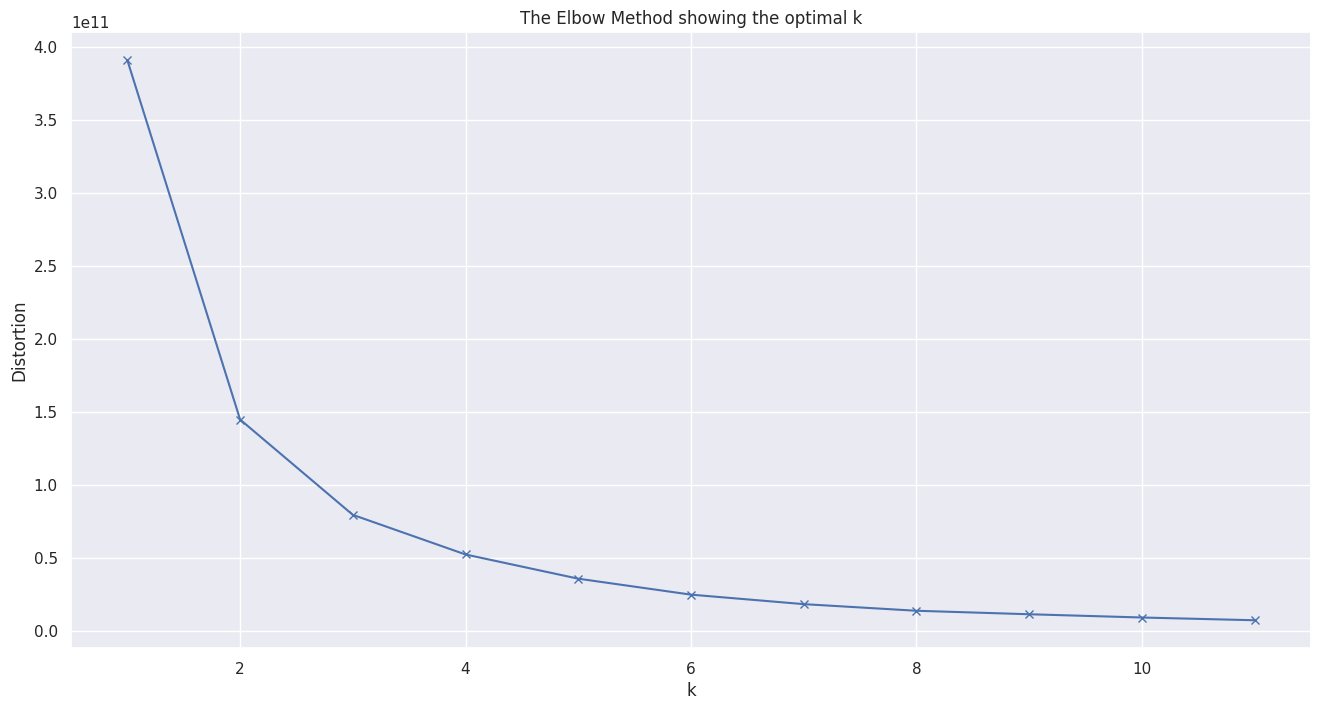

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Silhouette Score: 0.9845718693996556
Agglomerative Silhouette Score: 0.9707328051683931
dbscan Silhouette Score: 0.925808751892115


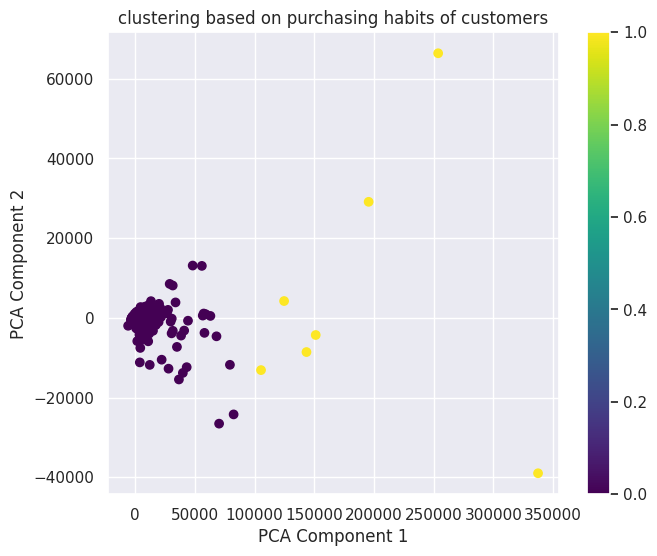

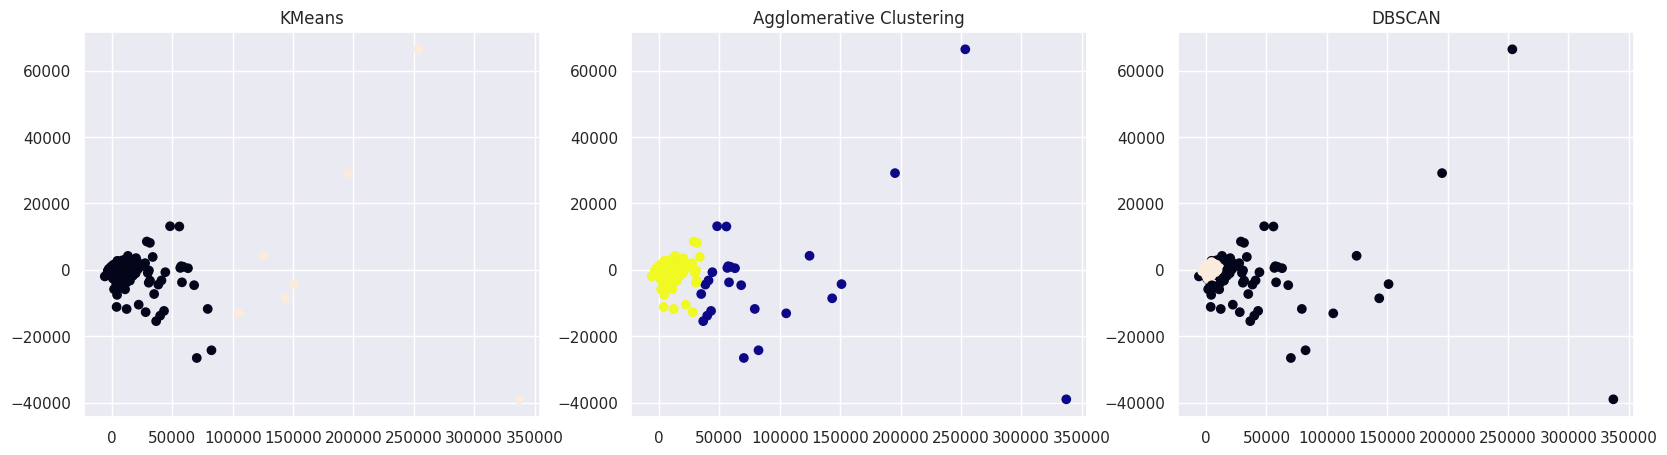

,invoce,Country,Mean_purchase,Sum_purchase,item,quantity,Mean_quantity,life_time,Cluster (kmeans),Cluster (agglomerative),cluster_kmeans (after pca),cluster_agg (after pca),cluster_dbscan (after pca)
CustomerID,,,,,,,,,,,,,
12346.0,2,35,0.000000,0.00,1,0,0.000000,0,11,4,0,1,0
12347.0,7,16,23.681319,4310.00,103,2458,13.505495,365,8,7,0,1,0
12348.0,4,12,57.975484,1797.24,22,2341,75.516129,282,12,8,0,1,0
12349.0,1,18,24.076027,1757.55,73,631,8.643836,0,0,8,0,1,0
12350.0,1,24,19.670588,334.40,17,197,11.588235,0,11,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,1,35,18.060000,180.60,10,45,4.500000,0,11,4,0,1,0
18281.0,1,35,11.545714,80.82,7,54,7.714286,0,11,4,0,1,0
18282.0,3,35,13.584615,176.60,12,98,7.538462,118,11,4,0,1,0


In [ ]:
# applying the concept of PCA and LDA to the customer dataframe to reduce the dimensionality of features

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df2)

# elbow method for determining optimum number of clusters -->
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_pca)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Perform clustering using KMeans, Agglomerative Clustering, and DBSCAN
from sklearn.cluster import DBSCAN
kmeans = KMeans(n_clusters=2, random_state=0)
agg = AgglomerativeClustering(n_clusters=2)
dbscan = DBSCAN(eps=1000, min_samples=10)

labels_kmeans = kmeans.fit_predict(X_pca)
labels_agg = agg.fit_predict(X_pca)
labels_dbscan = dbscan.fit_predict(X_pca)

# Add the cluster labels to the customer data
df2['cluster_kmeans (after pca)'] = labels_kmeans
df2['cluster_agg (after pca)'] = labels_agg
df2['cluster_dbscan (after pca)'] = labels_dbscan

from sklearn.metrics import silhouette_score
# Silhouette score for kmeans clustering
kmeans_score = silhouette_score(X_pca, labels_kmeans)
print(f'KMeans Silhouette Score: {kmeans_score}')

# Silhouette score for agglomerative clustering
agg_score = silhouette_score(X_pca, labels_agg)
print(f'Agglomerative Silhouette Score: {agg_score}')

# Silhouette score for dbscan clustering
db_score = silhouette_score(X_pca, labels_dbscan)
print(f'dbscan Silhouette Score: {db_score}')


# Visualize the clusters
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('clustering based on purchasing habits of customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()

# Visualize the clusters for all 3 algorithms that we apply to our dataset
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
ax[0].scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans)
ax[0].set_title('KMeans')
ax[1].scatter(X_pca[:,0], X_pca[:,1], c=labels_agg,cmap='plasma')
ax[1].set_title('Agglomerative Clustering')
ax[2].scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan)
ax[2].set_title('DBSCAN')
plt.show()

df2

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

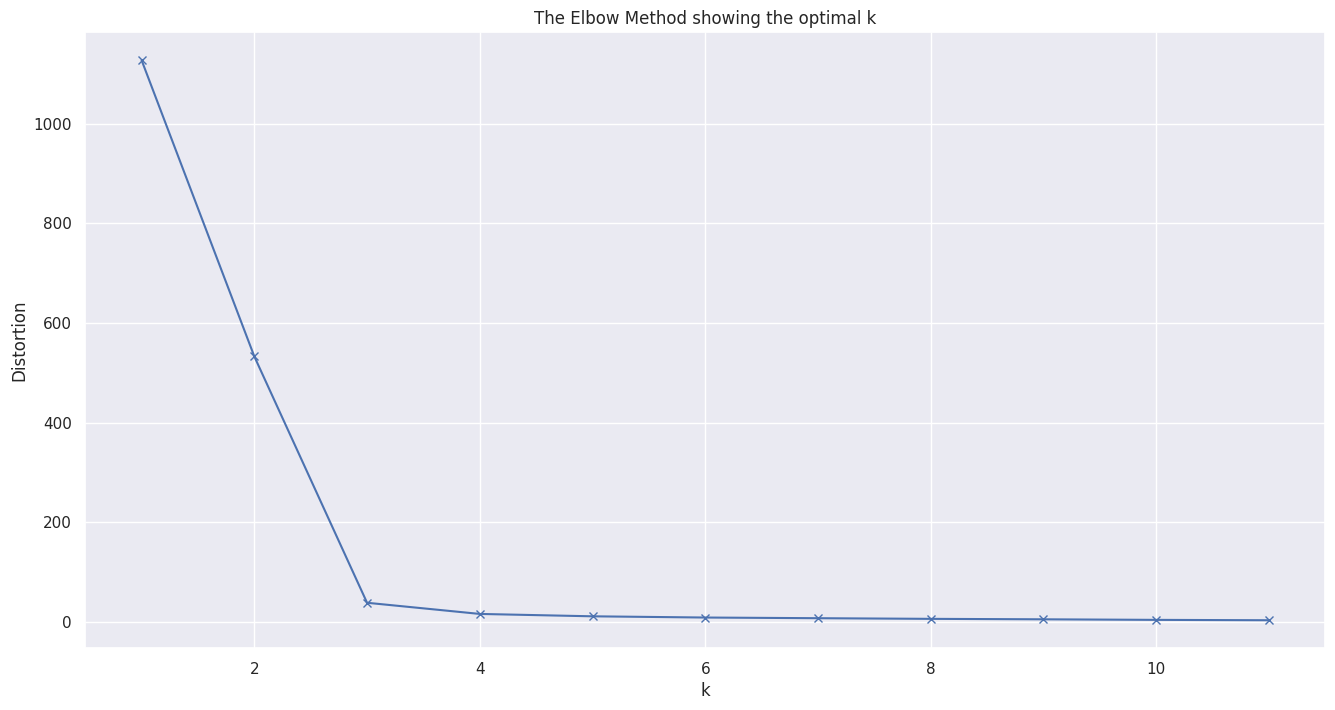

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Silhouette Score: 0.895080970254155
Agglomerative Silhouette Score: 0.8722074745348081


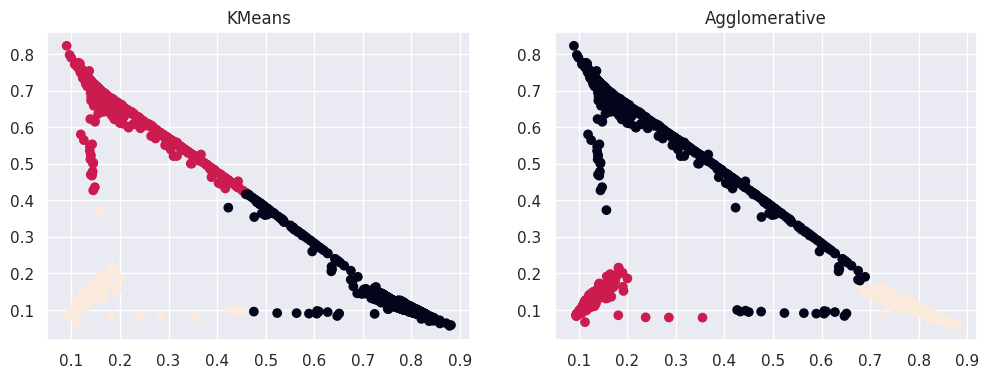

In [ ]:
# applying LDA -->
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MinMaxScaler
# Standardize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(df3)

# Apply LDA to reduce the dimensionality
lda = LatentDirichletAllocation(n_components=3, random_state=42)
X_lda = lda.fit_transform(X)

# elbow method for determining optimum number of clusters -->
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_lda)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_lda)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_lda)


from sklearn.metrics import silhouette_score
# Silhouette score for kmeans clustering
kmeans_score = silhouette_score(X_lda, kmeans_labels)
print(f'KMeans Silhouette Score: {kmeans_score}')

# Silhouette score for agglomerative clustering
agg_score = silhouette_score(X_lda, agg_labels)
print(f'Agglomerative Silhouette Score: {agg_score}')



# Plot the clusters
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(X_lda[:, 0], X_lda[:, 1], c=kmeans_labels)
axs[0].set_title('KMeans')

axs[1].scatter(X_lda[:, 0], X_lda[:, 1], c=agg_labels)
axs[1].set_title('Agglomerative')


plt.show()



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

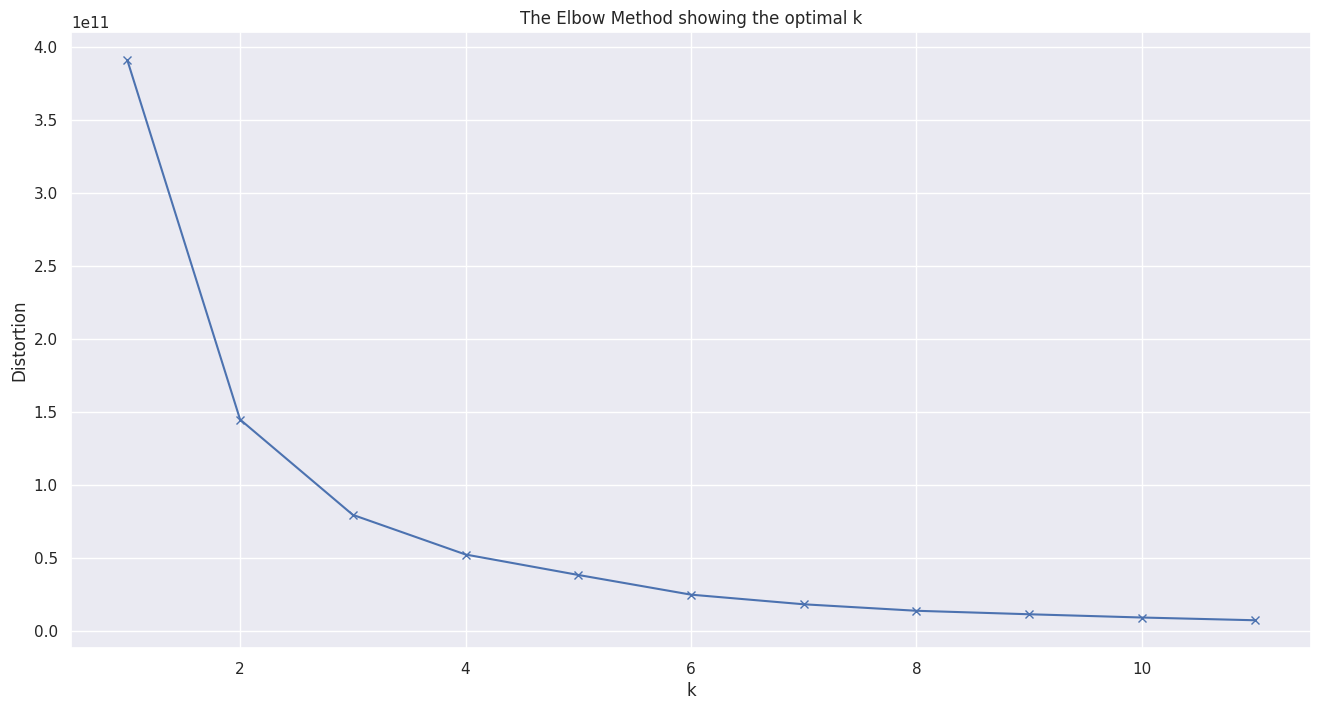

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Silhouette Score: 0.9636680229256678
Agglomerative Silhouette Score: 0.9636680229256678
dbscan Silhouette Score: 0.9636680229256678
            mean_purchase  sum_purchase  quantity  mean_quantity  \
CustomerID                                                         
12346.0          0.000000          0.00         0       0.000000   
12347.0         23.681319       4310.00      2458      13.505495   
12348.0         57.975484       1797.24      2341      75.516129   
12349.0         24.076027       1757.55       631       8.643836   
12350.0         19.670588        334.40       197      11.588235   
...                   ...           ...       ...            ...   
18280.0         18.060000        180.60        45       4.500000   
18281.0         11.545714         80.82        54       7.714286   
18282.0         13.584615        176.60        98       7.538462   
18283.0          2.771005       2094.88      1397       1.847884   
18287.0         26.246857       1837.28      

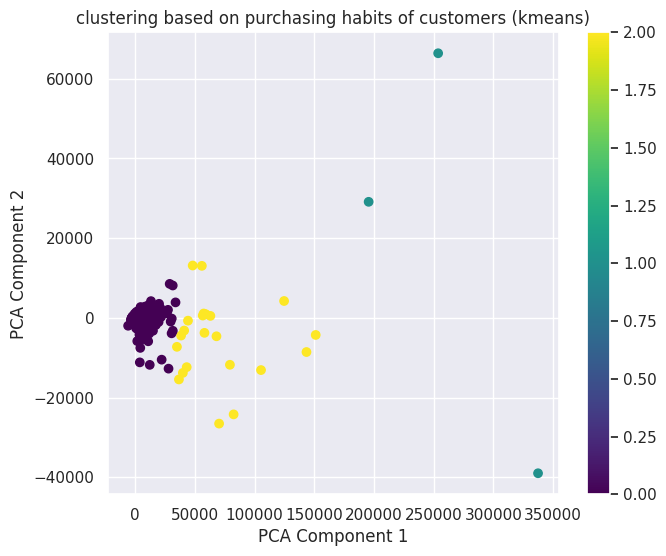

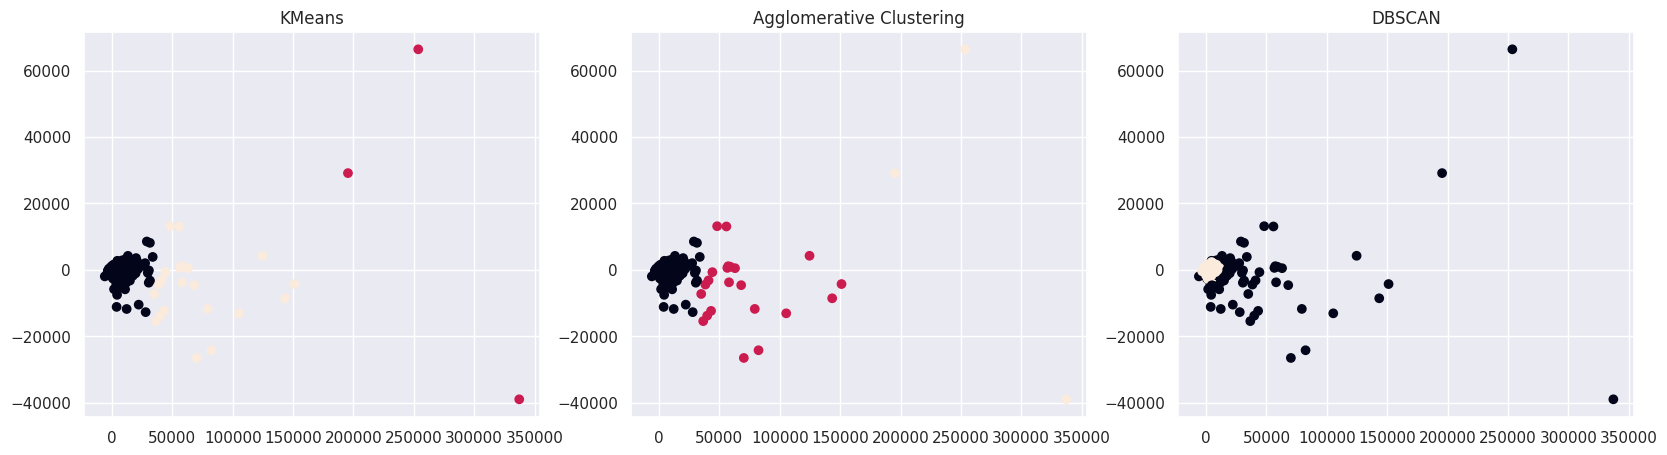

In [ ]:
# clustering customer based on PURELY type of product they buy and financial behavior which includes -->
# product type, number of unique products they buy, average price they spent, total price they spent, quantity etc
# used both general clustering and text clustering (for description column)
# In previous clustering we also take into account non-financial behavior like time at which customers-
# -like to shoping, country they belong to , number of times they go to purchase items etc


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

# Load the data
data = df

# Create a new dataframe of customers
customer_data = pd.DataFrame({
    'invoice': data.groupby('CustomerID')['InvoiceNo'].nunique(),
    'country': data.groupby('CustomerID')['Country'].unique().str[0],
    'mean_purchase': data.groupby('CustomerID')['TotalPrice'].mean(),
    'sum_purchase': data.groupby('CustomerID')['TotalPrice'].sum(),
    'item': data.groupby('CustomerID')['StockCode'].nunique(),
    'quantity': data.groupby('CustomerID')['Quantity'].sum(),
    'mean_quantity': data.groupby('CustomerID')['Quantity'].mean(),
    'life_time': (data.groupby('CustomerID')['InvoiceDate'].max() - data.groupby('CustomerID')['InvoiceDate'].min()).dt.days,
    'description': data.groupby('CustomerID')['Description'].apply(lambda x: ' '.join(x.dropna().unique()))
})

# Fill missing values with 0
customer_data.fillna(0, inplace=True)

# drop the country,item and life_time column (basically non-financial features)
X = customer_data.drop(['country','life_time','item','invoice'],axis=1)

# Vectorize the description column
vectorizer = TfidfVectorizer(stop_words='english')
X_desc = vectorizer.fit_transform(X['description'])

# Perform text clustering using KMeans
kmeans = KMeans(n_clusters= 20, random_state=0)
kmeans.fit(X_desc)

# Add the text cluster labels to the customer data
X['text_cluster'] = kmeans.labels_

# Perform PCA on the customer data
pca = PCA(n_components=2)
# since we have included the text clusters in our data frame there is no need for description column now
X_pca = pca.fit_transform(X[['mean_purchase', 'sum_purchase', 'quantity','text_cluster','mean_quantity']])

# elbow method for determining optimum number of clusters -->
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_pca)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


# Perform clustering using KMeans, Agglomerative Clustering, and DBSCAN
kmeans = KMeans(n_clusters=3, random_state=0)
agg = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=1000, min_samples=10)

labels_kmeans = kmeans.fit_predict(X_pca)
labels_agg = agg.fit_predict(X_pca)
labels_dbscan = dbscan.fit_predict(X_pca)

from sklearn.metrics import silhouette_score
# Silhouette score for kmeans clustering
kmeans_score = silhouette_score(X_pca, labels_kmeans)
print(f'KMeans Silhouette Score: {kmeans_score}')

# Silhouette score for agglomerative clustering
agg_score = silhouette_score(X_pca, labels_agg)
print(f'Agglomerative Silhouette Score: {agg_score}')

# Silhouette score for dbscan clustering
db_score = silhouette_score(X_pca, labels_dbscan)
print(f'dbscan Silhouette Score: {db_score}')

# Add the cluster labels to the customer data
X['cluster_kmeans'] = labels_kmeans
X['cluster_agg'] = labels_agg
X['cluster_dbscan'] = labels_dbscan

# Display the customer data
print(X)

# Visualize the clusters
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('clustering based on purchasing habits of customers (kmeans)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()

# Visualize the clusters for all 3 algorithms that we apply to our dataset
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
ax[0].scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans)
ax[0].set_title('KMeans')
ax[1].scatter(X_pca[:,0], X_pca[:,1], c=labels_agg)
ax[1].set_title('Agglomerative Clustering')
ax[2].scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan)
ax[2].set_title('DBSCAN')
plt.show()



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Silhouette Score: 0.6338820717804
Agglomerative Silhouette Score: 0.6215842287838671


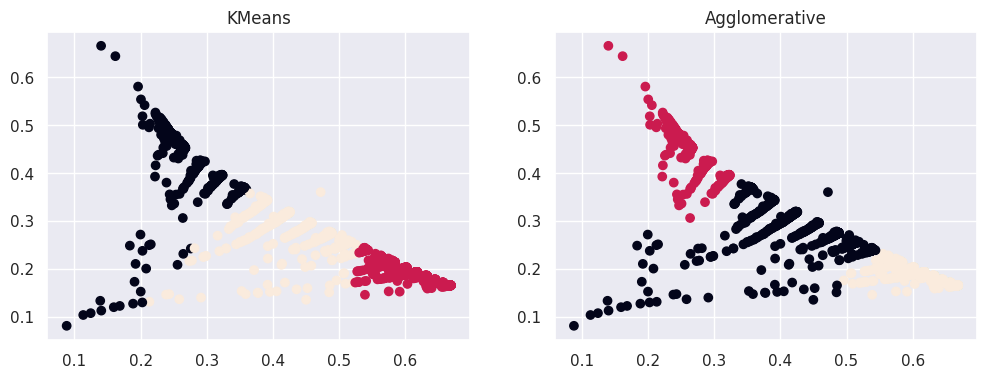

In [ ]:
# apply lda -->

y = pd.DataFrame(X).drop(['cluster_kmeans','cluster_agg','cluster_dbscan','description'],axis=1)
# Standardize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(y)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
X_lda = lda.fit_transform(X)

# Kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_lda)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_lda)


from sklearn.metrics import silhouette_score
# Silhouette score for kmeans clustering
kmeans_score = silhouette_score(X_lda, kmeans_labels)
print(f'KMeans Silhouette Score: {kmeans_score}')

# Silhouette score for agglomerative clustering
agg_score = silhouette_score(X_lda, agg_labels)
print(f'Agglomerative Silhouette Score: {agg_score}')



# Plot the clusters
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(X_lda[:, 0], X_lda[:, 1], c=kmeans_labels)
axs[0].set_title('KMeans')

axs[1].scatter(X_lda[:, 0], X_lda[:, 1], c=agg_labels)
axs[1].set_title('Agglomerative')


plt.show()



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

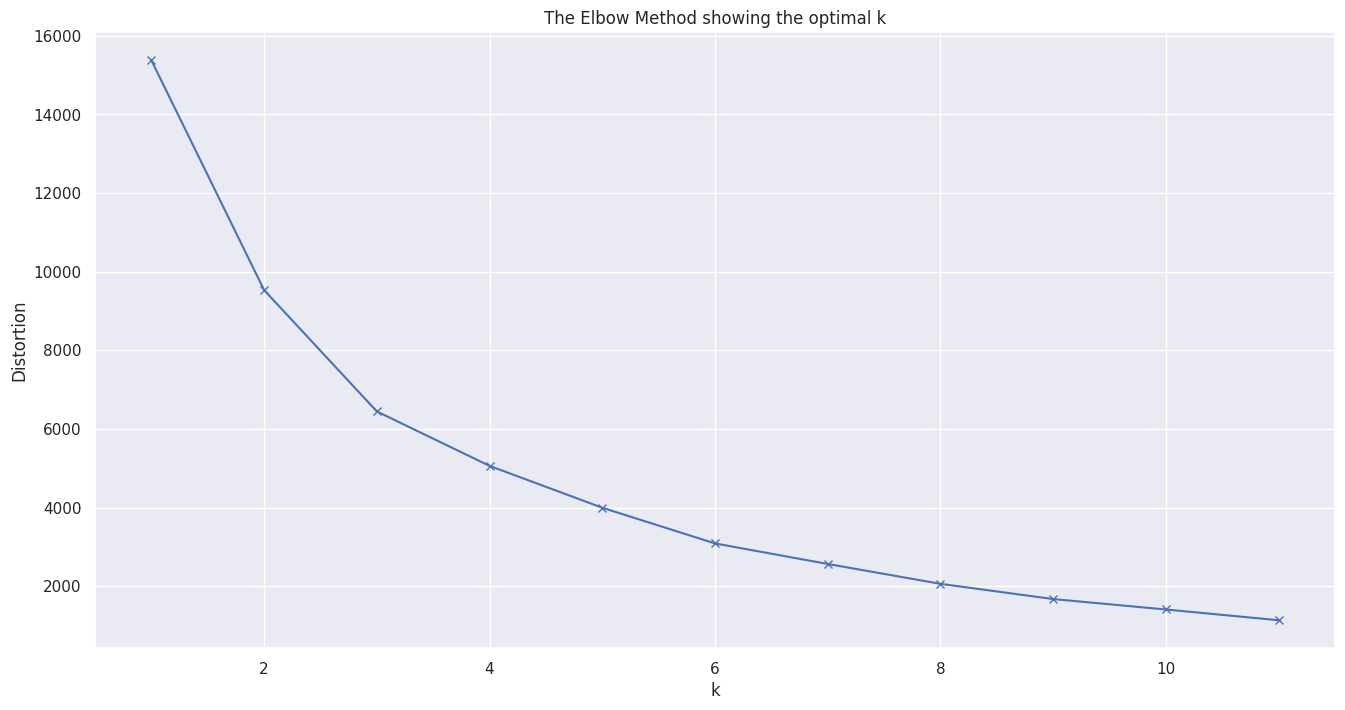

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Silhouette Score: 0.9558021817918642
Agglomerative Silhouette Score: 0.9558021817918642
dbscan Silhouette Score: 0.8183105928525618


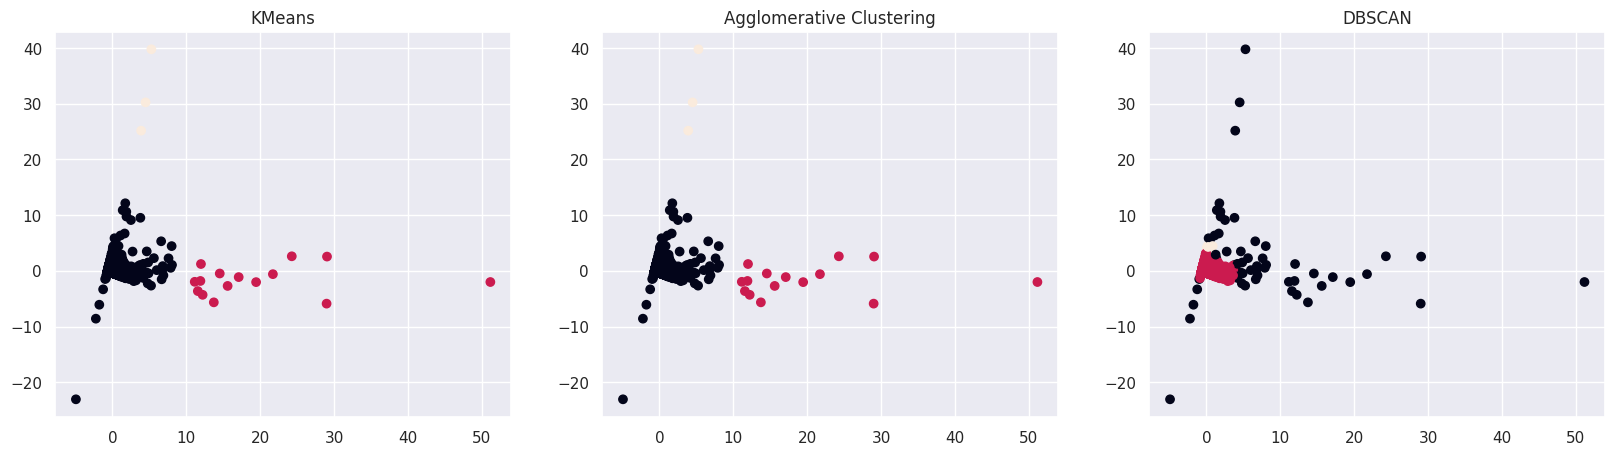

customers belong to cluster 0 :
[12346.0, 12347.0, 12348.0, 12349.0, 12350.0, 12352.0, 12353.0, 12354.0, 12355.0, 12356.0, 12357.0, 12358.0, 12359.0, 12360.0, 12361.0, 12362.0, 12363.0, 12364.0, 12365.0, 12367.0, 12370.0, 12371.0, 12372.0, 12373.0, 12374.0, 12375.0, 12377.0, 12378.0, 12379.0, 12380.0, 12381.0, 12383.0, 12384.0, 12386.0, 12388.0, 12390.0, 12391.0, 12393.0, 12394.0, 12395.0, 12397.0, 12398.0, 12399.0, 12401.0, 12402.0, 12403.0, 12405.0, 12406.0, 12407.0, 12408.0, 12409.0, 12410.0, 12412.0, 12413.0, 12414.0, 12417.0, 12418.0, 12420.0, 12421.0, 12422.0, 12423.0, 12424.0, 12425.0, 12426.0, 12427.0, 12428.0, 12429.0, 12430.0, 12431.0, 12432.0, 12433.0, 12434.0, 12435.0, 12436.0, 12437.0, 12438.0, 12441.0, 12442.0, 12444.0, 12445.0, 12446.0, 12447.0, 12448.0, 12449.0, 12450.0, 12451.0, 12452.0, 12453.0, 12454.0, 12455.0, 12456.0, 12457.0, 12458.0, 12461.0, 12462.0, 12463.0, 12464.0, 12465.0, 12468.0, 12471.0, 12472.0, 12473.0, 12474.0, 12475.0, 12476.0, 12477.0, 12478.0, 1247

,mean_purchase,sum_purchase,item,quantity,mean_quantity,kmeans clusters,agglomerative clusters,DBSCAN clusters
CustomerID,,,,,,,,
12346.0,0.000000,0.00,1,0,0.000000,0,0,0
12347.0,23.681319,4310.00,103,2458,13.505495,0,0,0
12348.0,57.975484,1797.24,22,2341,75.516129,0,0,0
12349.0,24.076027,1757.55,73,631,8.643836,0,0,0
12350.0,19.670588,334.40,17,197,11.588235,0,0,0
...,...,...,...,...,...,...,...,...
18280.0,18.060000,180.60,10,45,4.500000,0,0,0
18281.0,11.545714,80.82,7,54,7.714286,0,0,0
18282.0,13.584615,176.60,12,98,7.538462,0,0,0


In [ ]:
# similar clustering as previous one except it also includes country and excludes description of product.
# Therefore we cluster customers solely based on their financial and demographic characteristic, not on what type of products they are purchasing.
# make clusters using kmeans,aglomerative clustering,dbscan -->
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

models = [KMeans,AgglomerativeClustering,DBSCAN]
# Drop missing values
customer_data.dropna(inplace=True)

# drop non-financial columns
df_purchase_behavior = customer_data.drop(['life_time','country','description','invoice'], axis=1)

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df_purchase_behavior)

# Perform PCA for feature selection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# elbow method for determining optimum number of clusters -->
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_pca)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(X_pca)
df_purchase_behavior['kmeans clusters'] = kmeans_labels
# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(X_pca)
df_purchase_behavior['agglomerative clusters'] = agglo_labels

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)
df_purchase_behavior['DBSCAN clusters'] = dbscan_labels

from sklearn.metrics import silhouette_score
# Silhouette score for kmeans clustering
kmeans_score = silhouette_score(X_pca, kmeans_labels)
print(f'KMeans Silhouette Score: {kmeans_score}')

# Silhouette score for agglomerative clustering
agg_score = silhouette_score(X_pca, agglo_labels)
print(f'Agglomerative Silhouette Score: {agg_score}')

# Silhouette score for dbscan clustering
db_score = silhouette_score(X_pca, dbscan_labels)
print(f'dbscan Silhouette Score: {db_score}')

# Plot the clusters
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
ax[0].scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels)
ax[0].set_title('KMeans')
ax[1].scatter(X_pca[:,0], X_pca[:,1], c=agglo_labels)
ax[1].set_title('Agglomerative Clustering')
ax[2].scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels)
ax[2].set_title('DBSCAN')
plt.show()

# dataframe showing clusters of customers having similar purchasing behavior -->
from collections import defaultdict

cluster_dict = defaultdict(list)
for i, label in enumerate(kmeans.labels_):
    cluster_dict[label].append(df_purchase_behavior.index[i])
for key in cluster_dict :
  print("customers belong to cluster",key,":")
  print(cluster_dict[key])

df_purchase_behavior





